## Exercice 3 : Régression linéaire multiple
### objectif : utiliser la régression lineaire multiple pour modéliser une variable dépendante à partir de plusieurs variables indépendantes.
### Données : utiliser un jeu de données tel que mtCars dispo par défaut dans R. Ce jeu de données contient des informations sur différents voitures, incluant des variables comme la consomation d'essence (mpg),le poids (wt),la puissance (hp).
### Taches:
- charger les données.
- Explorer les données.
- visualisation : créez des graphiques pour explorer la relation entre mpg et les autres variables.Par exemple utilise pairs() ou ggplot2.
- Modélisation : créer un modele de regression linéaire multiple pour prédire mpg à partir de wt,hp,drat (ratio de transmission).
- Interprétation des résultats : Interpretez les coefficientes du modele et le R carré.
- Validation du modéle
> Vérifier les résidus.
- Prédiction :
> Utilisez le modéle pour prédire mpg pour de nouvelles observations.
- Conclusion :
> Discute les résultats obtenus de la qualité de modéle
> Quelles variable seulement avoir le plus d'influence sur la consomation d'essence ???

In [1]:
# tache 1:
df <- mtcars

In [4]:
# tache 2:
head(df)
summary(df)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

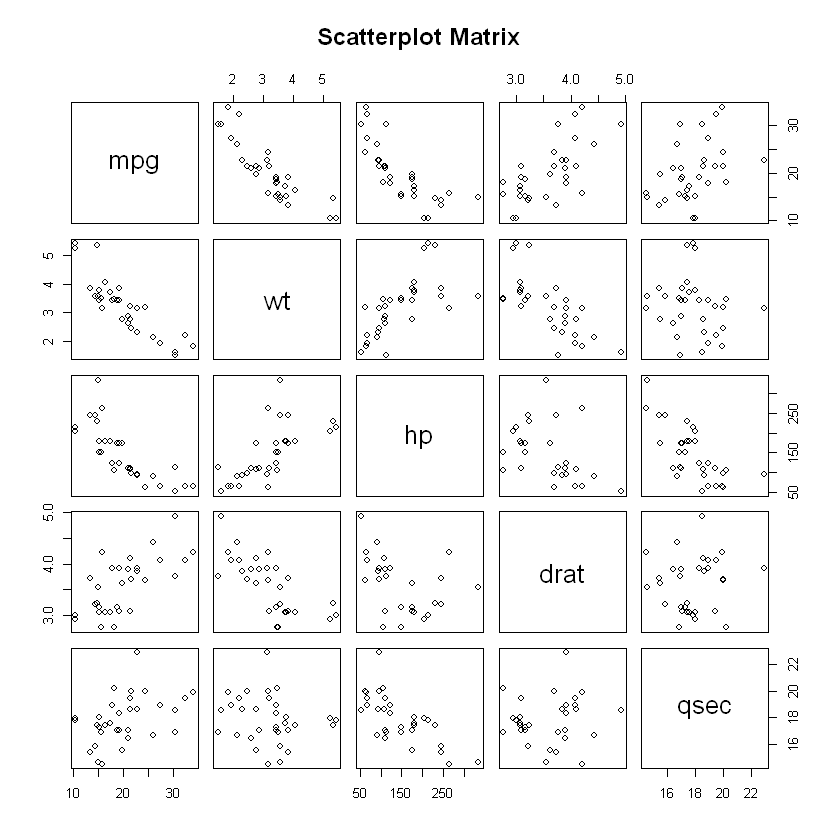

In [5]:
# tache 3:
pairs(df[, c("mpg", "wt", "hp", "drat", "qsec")], main = "Scatterplot Matrix")

In [6]:
# tache 4:
model <- lm(mpg ~ wt + hp + drat, data = df)
summary(model)


Call:
lm(formula = mpg ~ wt + hp + drat, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3598 -1.8374 -0.5099  0.9681  5.7078 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.394934   6.156303   4.775 5.13e-05 ***
wt          -3.227954   0.796398  -4.053 0.000364 ***
hp          -0.032230   0.008925  -3.611 0.001178 ** 
drat         1.615049   1.226983   1.316 0.198755    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.561 on 28 degrees of freedom
Multiple R-squared:  0.8369,	Adjusted R-squared:  0.8194 
F-statistic: 47.88 on 3 and 28 DF,  p-value: 3.768e-11


> Le R-carré multiple de 0.8369 indique que 83.69% de la variance de la consommation de carburant est expliquée par les variables indépendantes du modèle. Le R-carré ajusté de 0.8194 prend en compte le nombre de variables dans le modèle.
<br>

> Ces résultats montrent une forte relation entre les variables indépendantes (wt, hp, drat) et la consommation de carburant (mpg).

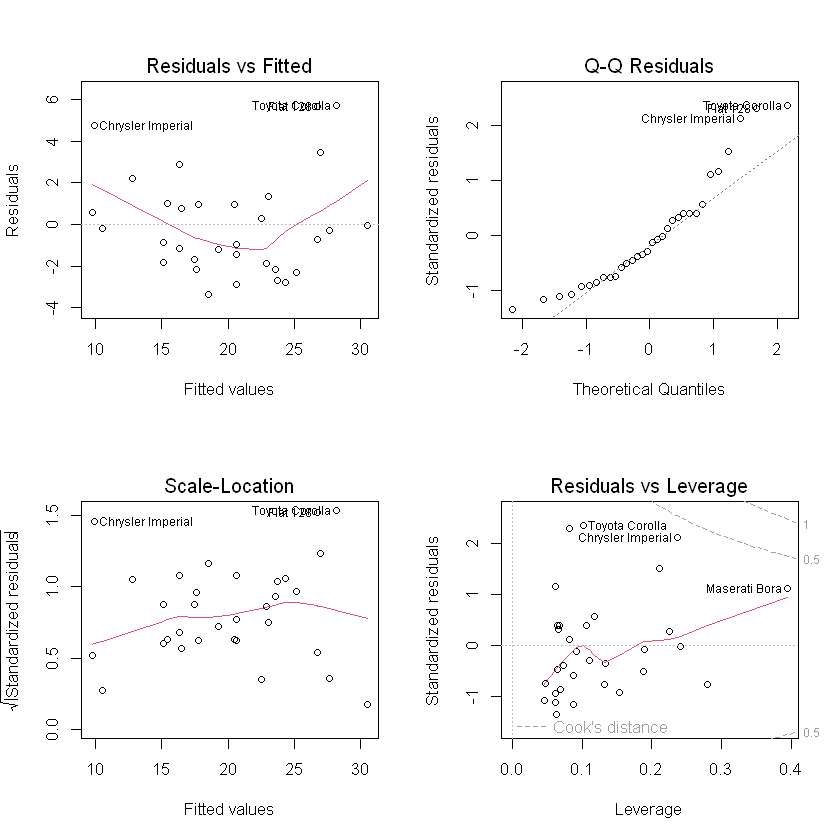

In [8]:
# tache 5:
par(mfrow = c(2, 2))
plot(model)

> les diagnostics suggèrent que le modèle est bien ajusté, avec une bonne vérification des hypothèses de linéarité, normalité des résidus, et homogénéité des variances. Quelques points pourraient être influents mais ne semblent pas affecter considérablement le modèle.

In [9]:
# tache 6:
new_data <- data.frame(wt = c(3.0, 2.5), hp = c(110, 95), drat = c(3.7, 3.9))
predictions <- predict(model, newdata = new_data)
print(predictions)

       1        2 
22.14141 24.56185 
